# Метод главных компонент - Principal Component Analysis

Перейдём к алгоритмам обучения без учителя, выполняющих **уменьшение размерности (dimension reduction)**.

Уменьшение размерности ставит следующие цели:
1) Понять, какие признаки больше всего объясняют большую часть вариации в данных
2) Помочь людям лучше понять большие и сложные наборы данных, особенно с помощью визуализации данных

**Обобщая вышесказанное, главная цель метода главных компонент - взять сложный набор данных, и найти в нём главные компоненты**

**Важное замечаение:** уменьшение размерности **НЕ** предполагает что мы возьмём только отдельные признаки из всего набора признаков, т.е., например, было 40 признаков из которых взяли только 5. Вместо этого, создаются новые признаки, которые являются комбинациями исходных признаков в некоторых пропорциях.

## Уменьшение размерности

Представим данные с двумя признаками:

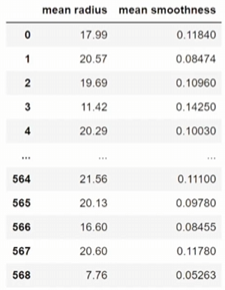

Для двух признаков можно построить график `scatterplot`, чтобы проанализировать связь между двумя признаками.

Если же признаков будет три, то можно либо построить трёхмерный график, либо двухмерный график + раскраска точек разными цветами по третьему измерению:

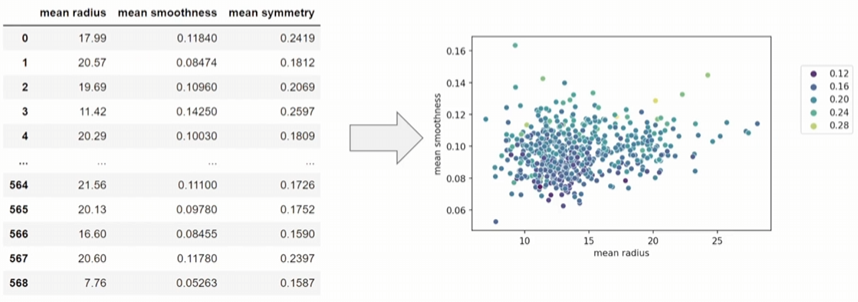

Если же у нас будет 30 признаков (30 измерений), что делать в таком случае?

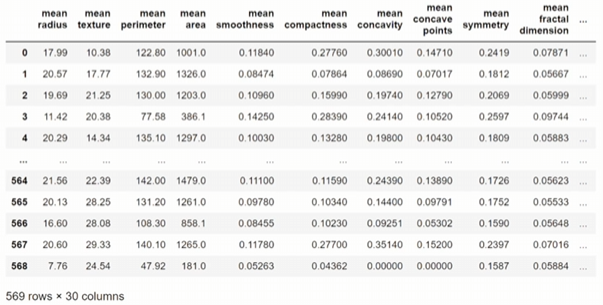

Уменьшение размерности поможет визуализировать данные и лучше понимать сложные наборы данных. Также появится возможность получить более простой набор данных для применения в других алгоритмах машинного обучения.

**Сначала уменьшаем размерность с помощью PCA, затем применяем другой алгоритм машинного обучения, который в итоге будет работать быстрее для меньшего количества признаков.**

Выполняя такую **трансформацию** признаков мы уменьшаем **ВСЁ** количество признаков до нужного количества. Это отличается от простого выбора только некоторых признаков.

## Объяснение вариативности (Variance Explained)

Некоторые признаки могут быть важнее других признаков. Например, для задачи определения цены дома - размер дома намного лучше объясняет цену дома, чем цвет фасада дома. 

Идея важности признаков понятна, когда работа происходит с размеченными данными, но что делать в том случае, когда данные не размечены? 

Можно измерять соотношение, в котором каждый признак отвечает за вариативность данных, т.е. за разброс значений в данных.

Рассмотрим следующий набор данных с двумя признаками:

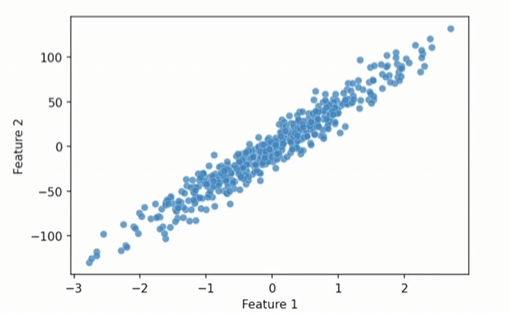

Идея метода PCA состоит в том, чтобы посмотреть на эти данные в терминах каких-то других измерений причём таким образом, чтобы объединить признак 1 и признак 2.

В данном примере можно взять вот такое новое измерение:

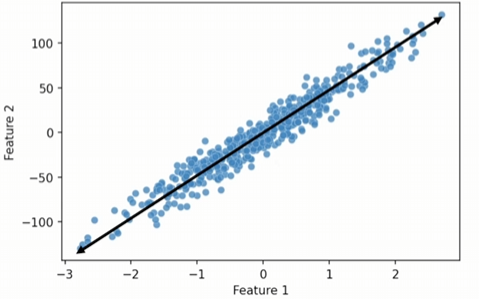

Это новое измерение, по определению является **комбинацией двух исходных измерений**. Кроме этой новой оси, можно также добавить вторую новую ось:

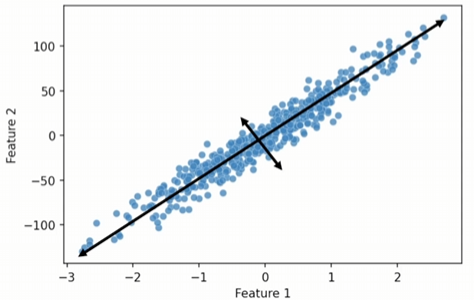

Получили две новые оси, другую систему координат. После этого ставится вопрос - для этих двух новых осей, какая из них имеет наибольшую вариативность данных? В нашем примере - это первая ось.

В итоге, с помощью метода главных компонент, в данном примере можно перейти от двух измерений к одному. 

Для этого:

    Во-первых - находим это одно измерение
    Во-вторых - проецируем все точки из исходного пространства на это новое одномерное измерение, т.е. в одномерное пространство

Это будет первая главная компонента:

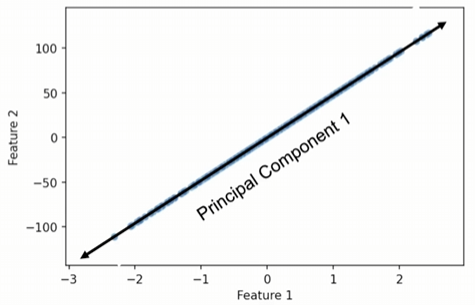

Если же таких компонент будет несколько, то метод главных компонент будет нумеровать их таким образом, что **первыми идут те компоненты, которые больше всего объясняют вариативность в данных**. Здесь получается лишь **одно измерение**, которое **является линейной комбинацией двух исходных измерений**.

Теперь можно нанести все точки на график, который содержит только одно измерение:

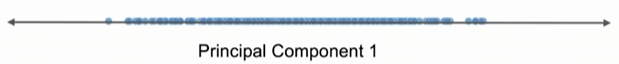

В данном примере был осуществлён переход от двух измерений к одному, но в других задачах такой переход может быть от намного большего числа измерений к более меньшему их числу.

**Главные компоненты** - это новые измерения, которые являются линейными комбинациями исходных измерений. Чем боьше какой-то исходный признак влияет на вариативность в данных, тем больше этот признак участвует в главных компонентах.

В нашем примере мы перешли от 2 признаков к 1 главной компоненте, которая может объяснить некоторый процент вариативности в исходных данных, например 90%. Оставшиеся 10% - были потеряны при сокращении размерности. Вторая главная компонента, очень маленького размера, которая была перпендикулярна первой главной компоненте, как раз содержала оставшиеся 10% вариативности данных. Убирая эту вторую компоненту мы теряем некоторую часть вариативности, но лишь небольшую её часть.

Получается, что **необходимо найти некоторый баланс между полнотой объяснения вариативности с одной стороны и сокращением количества измерений с другой стороны**.

## Математика PCA

Метод главных компонент создаёт новый набор измерений (главных компонент), которые являются нормализованными линейными комбинациями исходных признаков.

Если у нас есть исзодный набор признаков $X_1, X_2, \dots, X_p$, то первая главная компонента будет равна линейной комбинации Исходных признаков $X$ с некоторыми коэффициентами: $$Z_1 = \phi_{11}X_1 + \phi_{21}X_2 + \dots + \phi_{p1}X_p$$

Так, для  главной компоненты из прошлого примера: 

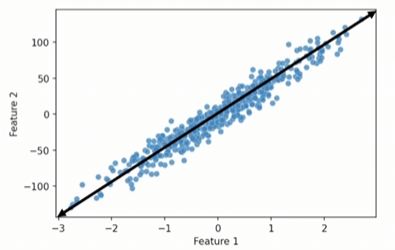

Можно записать следующее уравнение: $$Z_1 = \phi_{11}X_1 + \phi_{21}X_2$$

Это новое измерение берет некоторую информацию из $X_1$ и некоторую информацию из $X_2$.

### Как можно вычислить эти главные компоненты

Начнём с двух измерений:

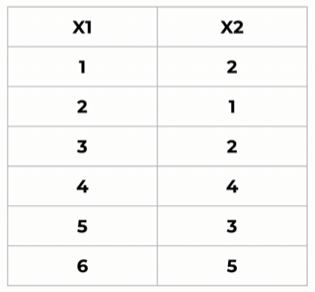

При нанесении этих данных на график, получим следующий результат:

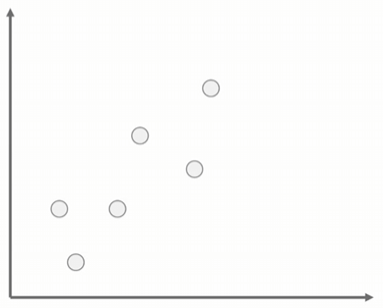

**Первый шаг** в методе главных компонент - стандартизация данных. Необходимо сделать так, чтобы среднее значение стало нулевым. Для каждого признака мы находим значение точек для данного конкретного признака и вычисляем среднее значение.

В данном примере мы сначала вычисляем значение для признака $X_2$ по вертикали, а затем то же самое для признака $X_1$ по горизонтали:

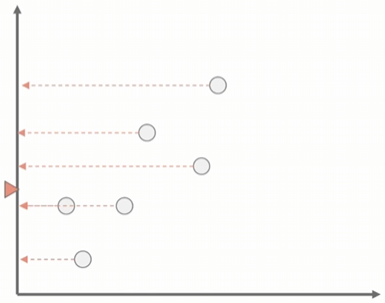

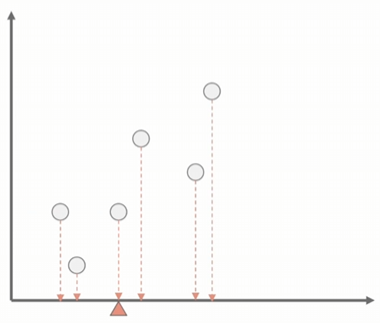

В итоге, получаем некоторый центр всего набора данных:

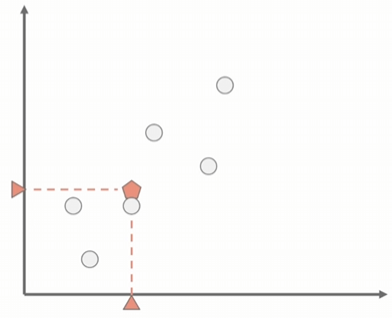

**Вторым шагом** - смещаем ось координат таким образом, чтобы начало координат располагалось в этой центральной точке:

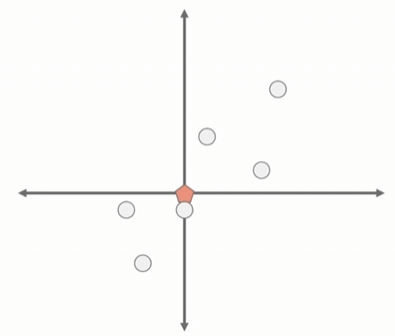

---
**ВАЖНО: расположение точек относительно друг друга не поменялось, было произведено просто перемещение начала координат!**

---

Также, кроме смещения начала координат, меняется масштаб признаков таким образом, чтобы все значения менялись в диапазоне от -1 до 1.

**Третьим шагом** - вычисляем ковариационную матрицу для данных.

---
---
**Линейное преобразование данных**

1) В терминах точек:
 
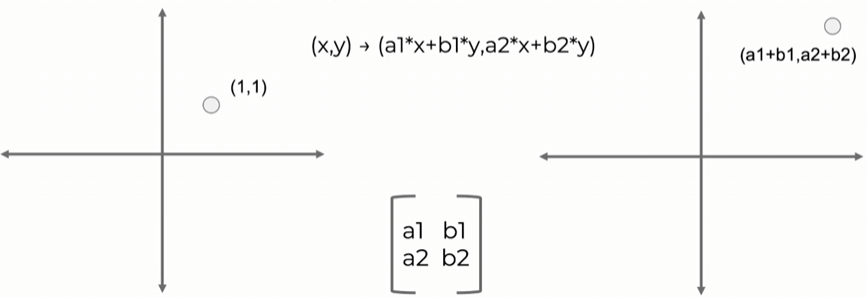

2) В терминах векторов:

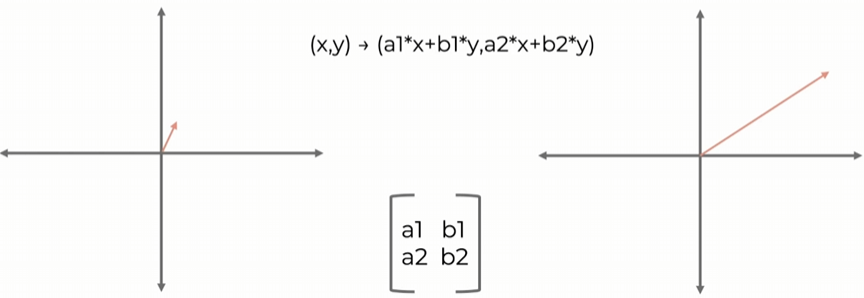

3) Для некоторого пространства точек

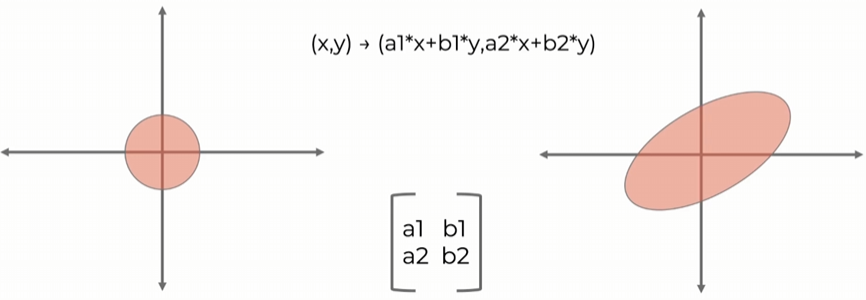

В общих случаях, после преобразования, вектор может поменять как направление, так и длину. Однако могут встречаться такие вектора, которые после линенйного преобразоания имеют то же самое направление, что и перед преобразованием:

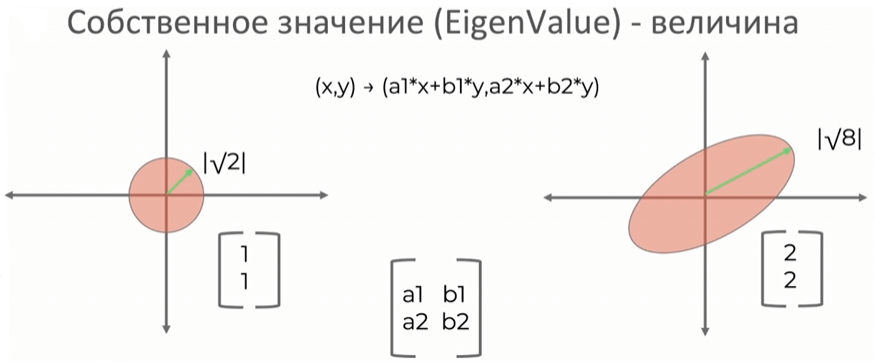

Эти вектора содержат в себе некоторую информацию о направлении вектора, потому что для них это направление не меняется во время линейного преобразования. Длина этих векторов вычисляется как квадратный корень суммы квадратов отдельных координат.

Следующим шагом берётся вектор ортогональный, ранее найденому собственному вектору, такой вектор найдётся для каждого собственного вектора:

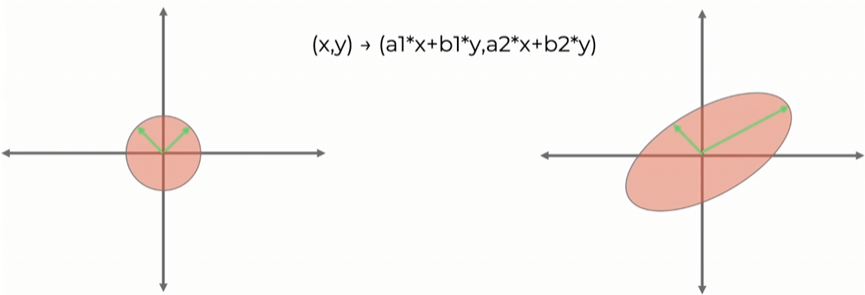

В конечном итоге - возьмём некоторую ковариационную матрицу и с её помощью выполним линейное преобразование исходных данных:

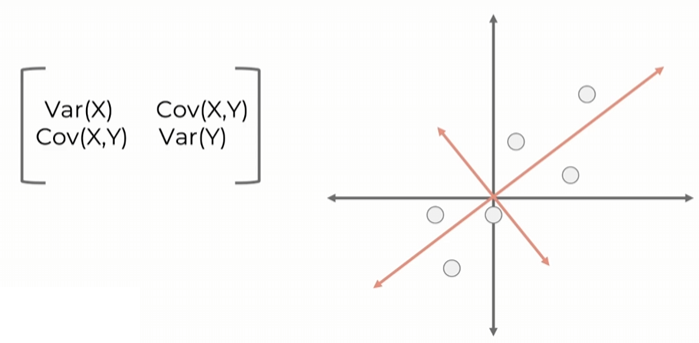

Мы получаем некоторые главные компоненты, которые являются собственными векторами. Ковариационная матрица выглядит следующим образом:

    * На диагонали матрицы располагаются дисперсии компонент вектора
    * В других ячейках - ковариации между компонентами вектора

Каждый собственный вектор - такой вектор, который будет иметь такое же направление даже после линейного преобразования данных.

Кроме собственных вектором можно вычислить собственные значения:

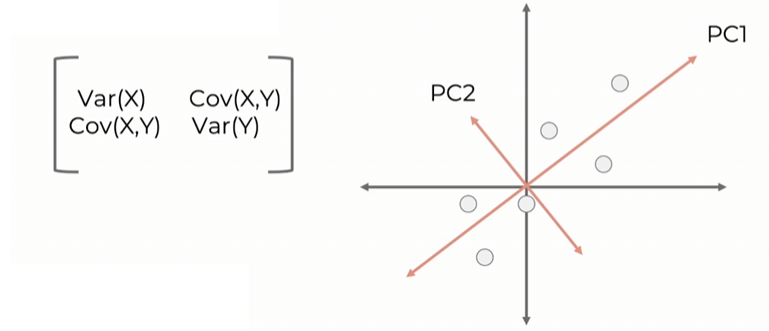

Собственное значение - это число на которое умножается собственный вектор под действием линейного преобразования. Такие значения описывают то, насколько тот или иной главный компонент объясняет вариативность в данных.

Таким образом получаем набор главных компонент, после чего берём не все компоненты, а только самые первые - те, которые больше других объясняют вариативность в данных. Для нашего примера - берём первую главную компоненту: 

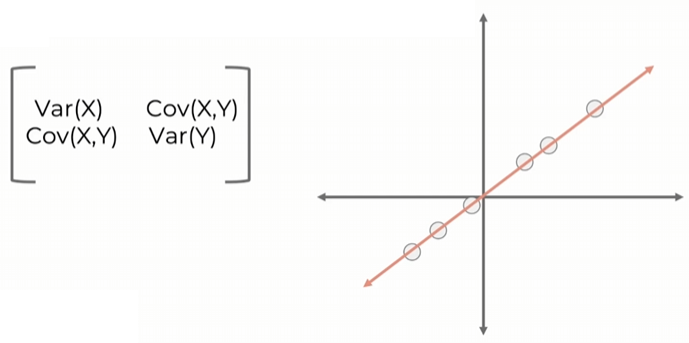

После чего проецируем все точки на выбранные компоненты.

Получеаем график, на котором всего одно измерение:

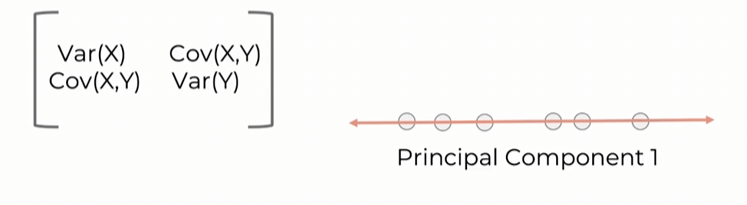

---
---

**Шаги метода главных компонент:**
1) Берём исходные данные
2) Вычисляем ковариационную матрицу
3) Вычисляем собственные вектора
4) Сортируем собственные вектора по их собственным значениям, чтобы найти те из них, которые больше других объясняют вариативность в данных. Сортировка выполняется по убыванию, чтобы самые крупные собственные значения оказались в начале.
5) Берём первые N наибольших собственных значений
6) Проецируем исходные точки на выбранные собственные вектора